# Проект: Анализ A/B теста для интернет-магазина

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#График-кумулятивной-выручки" data-toc-modified-id="График-кумулятивной-выручки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>График кумулятивной выручки</a></span></li><li><span><a href="#График-кумулятивного-среднего-чека-по-дням" data-toc-modified-id="График-кумулятивного-среднего-чека-по-дням-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>График кумулятивного среднего чека по дням</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A" data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>График относительного изменения кумулятивного среднего чека группы B к группе A</a></span></li><li><span><a href="#График-кумулятивного-среднего-количества-заказов" data-toc-modified-id="График-кумулятивного-среднего-количества-заказов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>График кумулятивного среднего количества заказов</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-количества-заказов-на-посетителя-группы-B-к-группе-A" data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-количества-заказов-на-посетителя-группы-B-к-группе-A-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A</a></span></li><li><span><a href="#Точечный-график-количества-заказов-по-пользователям" data-toc-modified-id="Точечный-график-количества-заказов-по-пользователям-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Точечный график количества заказов по пользователям</a></span></li><li><span><a href="#95-й-и-99-й--перцентили-количества-заказов-по-пользователям" data-toc-modified-id="95-й-и-99-й--перцентили-количества-заказов-по-пользователям-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>95-й и 99-й  перцентили количества заказов по пользователям</a></span></li><li><span><a href="#Точечный-график-стоимостей-заказов" data-toc-modified-id="Точечный-график-стоимостей-заказов-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Точечный график стоимостей заказов</a></span></li><li><span><a href="#95-й-и-99-й-перцентили-стоимости-заказов" data-toc-modified-id="95-й-и-99-й-перцентили-стоимости-заказов-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>95-й и 99-й перцентили стоимости заказов</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«сырым»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«сырым»-данным-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным</a></span></li><li><span><a href="#Очистка-данных-от-выбросов" data-toc-modified-id="Очистка-данных-от-выбросов-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Очистка данных от выбросов</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«очищенным»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«очищенным»-данным-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным</a></span></li><li><span><a href="#Принятие-решения-по-результатам-теста" data-toc-modified-id="Принятие-решения-по-результатам-теста-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Принятие решения по результатам теста</a></span></li></ul></div>

In [1]:
import pandas as pd
import datetime as dt
import scipy.stats as stats
import scipy
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Часть 1

Подгрузим датасет и изучим данные:

In [2]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим ICE для приоритизации наших гипотез. Отсортируем по убыванию приоритета.

In [3]:
hypothesis['ICE'] = round((hypothesis['Impact']* hypothesis['Confidence'])/hypothesis['Efforts'], 1)
hypothesis[['Hypothesis','ICE']].sort_values(by = 'ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Итак, первая тройка лидеров - номера 8, 0, 7. Проверим вторым тестом RICE.

In [4]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE', 'ICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.2
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.1
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.0


Итак, охват внес коррективы и лидеры изменились. Именно из-за высоких оценок охвата выбились в лидеры 7 и 2 гипотезы, а лидер ICE теста сместился в середину рейтинга.

# Часть 2

In [5]:
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings("ignore")
register_matplotlib_converters()

In [6]:
try:
    orders = pd.read_csv('orders.csv', sep=',')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', sep=',')

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

try:
    visitors = pd.read_csv('visitors.csv', sep=',')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=',')

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [7]:
# посмотрим на содержимое таблиц
print(orders.head())
print(visitors.head())

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


In [8]:
print(orders.info())
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


In [9]:
print('Дубликатов', orders.duplicated().sum())
print('Дубликатов', visitors.duplicated().sum())

Дубликатов 0
Дубликатов 0


Поскольку мы не знаем, что за данные нам предоставлены, целесообразно будет проверить данные как минимум на дубликаты между группами. Вообще лучше перед А/В-тестом проводить А/А-тест с целью проверить правильность огранизации A/B теста.

In [10]:
#Разделим записи на группы
groupa = orders.query('group == "A"')
groupb = orders.query('group == "B"')

In [11]:
#Посмотрим, дублируются ли записи
dublicated = groupa.merge(groupb, how = 'inner', on = 'visitorId')
dublicated.visitorId.nunique()

58

In [12]:
#Уточним, сколько всего уникальных пользователей
orders['visitorId'].nunique()

1031

Вероятно, пользователи были неверно поделены на группы в тесте. По правилам в каждой группе должны быть уникальные пользователи. Поэтому придется убрать эти 58 дублирующихся пользователей, они составят около 5% от общих пользователей, можно ими пренебречь.

In [13]:
orders = orders[~orders['visitorId'].isin(dublicated['visitorId'])]

In [14]:
#Проверим, что все корректно
orders['visitorId'].nunique()

973

Теперь приступим к формированию кумулятивной выручки:

In [15]:
# Соберем все данные по датам и группам
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'transactions',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData.head()

,date,group,transactions,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


### График кумулятивной выручки

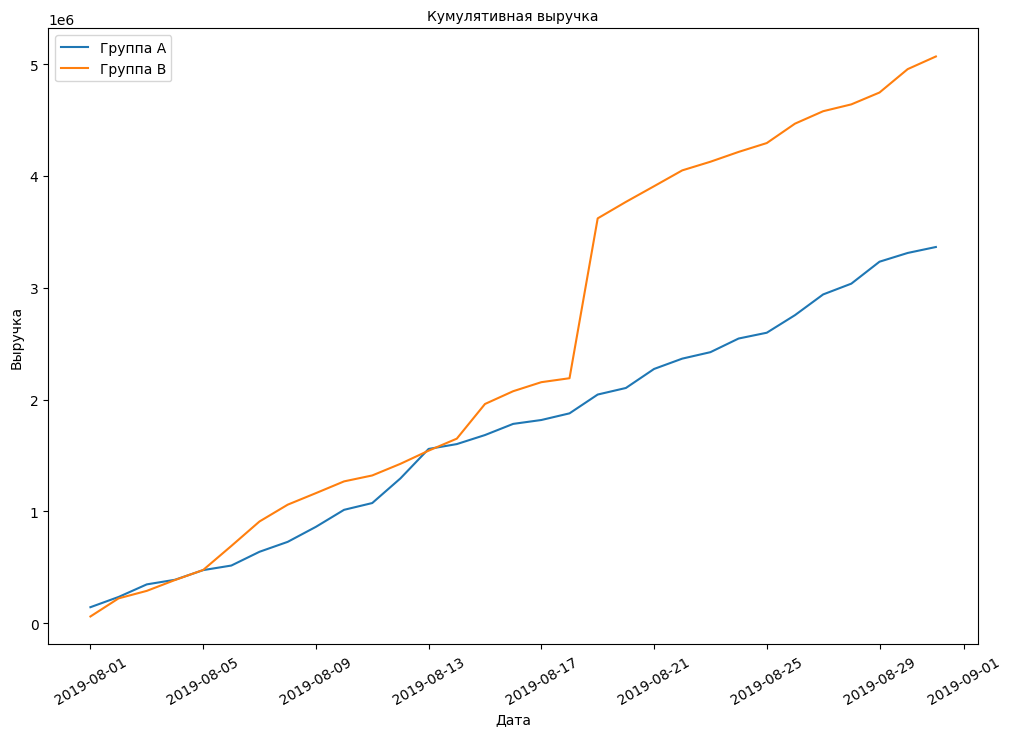

In [16]:
# Соберем данные по группам, чтобы построить графики куммулятивной выручки
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactions']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactions']]
# Строим график выручки группы А
plt.figure(figsize = (12, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа А')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')
plt.title('Кумулятивная выручка', fontsize=10)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation = 30)
plt.legend()
plt.show()

По графику видно, что первые две недели значительных отличий между группами не наблюдалось, однако затем с 13.08 по 17.08 у группы В наблюдался плавный рост выручки относительно группы А, а 18.08 случился резкий скачок, который позволил группе В с большим отрывом обойти выручку группы А. Однако, такой всплеск на графике скорее похож на выброс. Возможно это один очень дорогой заказ, а может быть существенно увеличилось количество заказов. Оценим это позже. Судя по дальнейшему плавному движению графика группы В, после исключения выброса группа В будет опережать группу А совсем незначительно.

### График кумулятивного среднего чека по дням

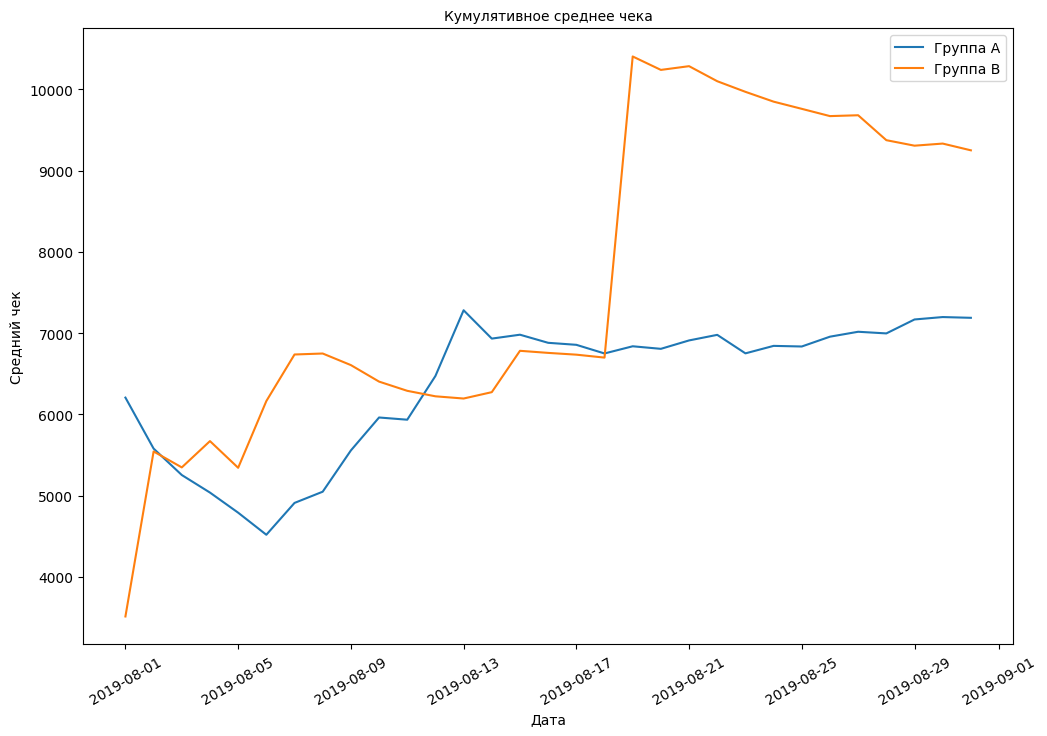

In [17]:
#построим график кумулятивного среднего чека по дням
plt.figure(figsize = (12, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactions'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactions'], label='Группа B')
plt.title('Кумулятивное среднее чека', fontsize=10)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation = 30)
plt.legend()
plt.show()

Здесь также виден значительный скачок 18.08 за счет чего группа В вырвалась вперед, скорее всего здесь действительно был выброс в данных. Однако далее график успокоился, наблюдается снижение среднего чека группы В и плавный рост группы А. Говорить о стабилизации еще рано, показатели плавно меняются. Скорее всего при анализе без выбросов график был бы более спокойным, однако на данный момент оценить преимущество какой-либо из групп не представляется возможным.

### График относительного изменения кумулятивного среднего чека группы B к группе A

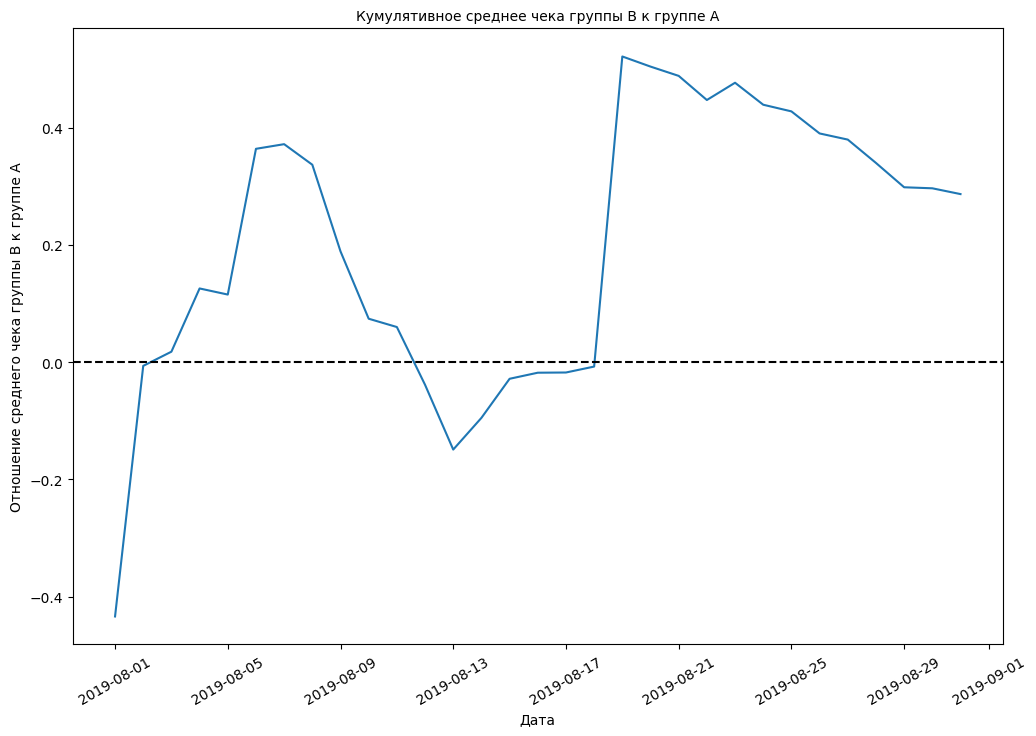

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, \
                                                   left_on='date', right_on='date', \
                                                   how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize = (12, 8))
plt.plot(mergedCumulativeRevenue['date'], \
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1)

plt.title('Кумулятивное среднее чека группы B к группе A', fontsize=10)
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы В к группе А')
plt.xticks(rotation = 30)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Видим резкие изменения графика в некоторые даты, замеченный нами ранее всплеск 18.08 позволил группе В значительно улучшить свои позиции, однако далее наблюдалось плавное падение. Пока непонятно, значительное ли было падение и как это повлияет на чистый результат. Посмотрим после исключения выбросов.

### График кумулятивного среднего количества заказов

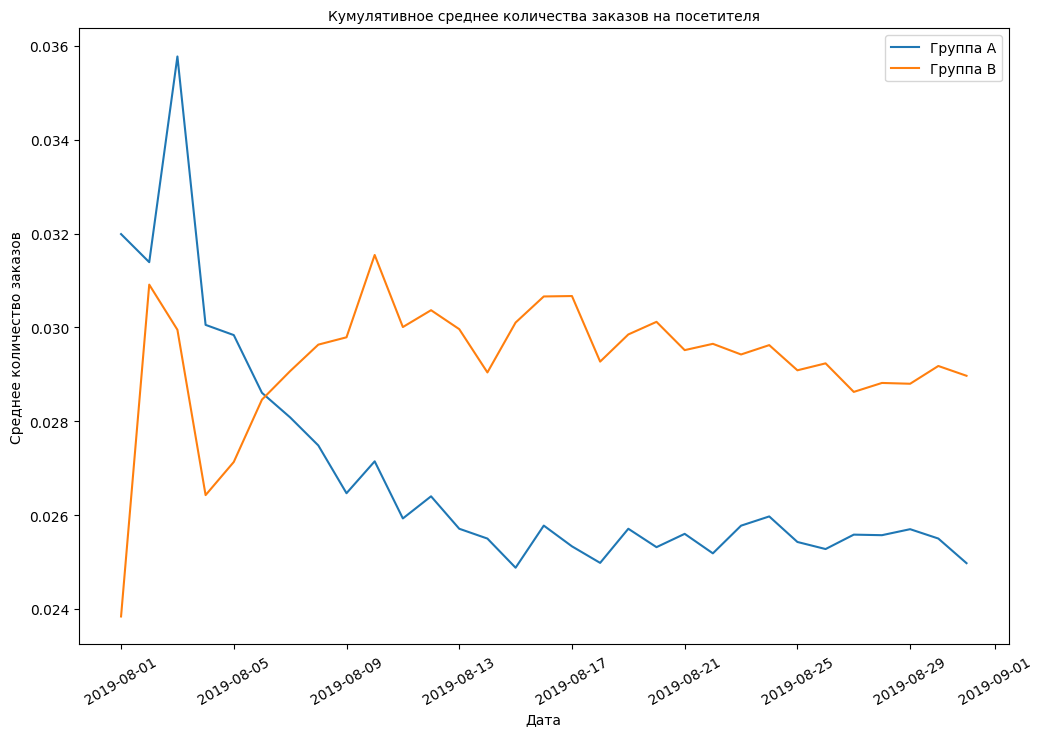

In [19]:
cumulativeData['avg_ord'] = cumulativeData['transactions']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize = (12, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['avg_ord'], label='Группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['avg_ord'], label='Группа B')
plt.title('Кумулятивное среднее количества заказов на посетителя', fontsize=10)
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.xticks(rotation = 30)
plt.legend()
plt.show()

Здесь мы видим, что в обеих группах кумулятивное среднее количества заказов на посетителя сначала "штормило", но со временем показатели "успокоились", причем группа В опять лидирует, причем в данном случае по-честному, без выбросов.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

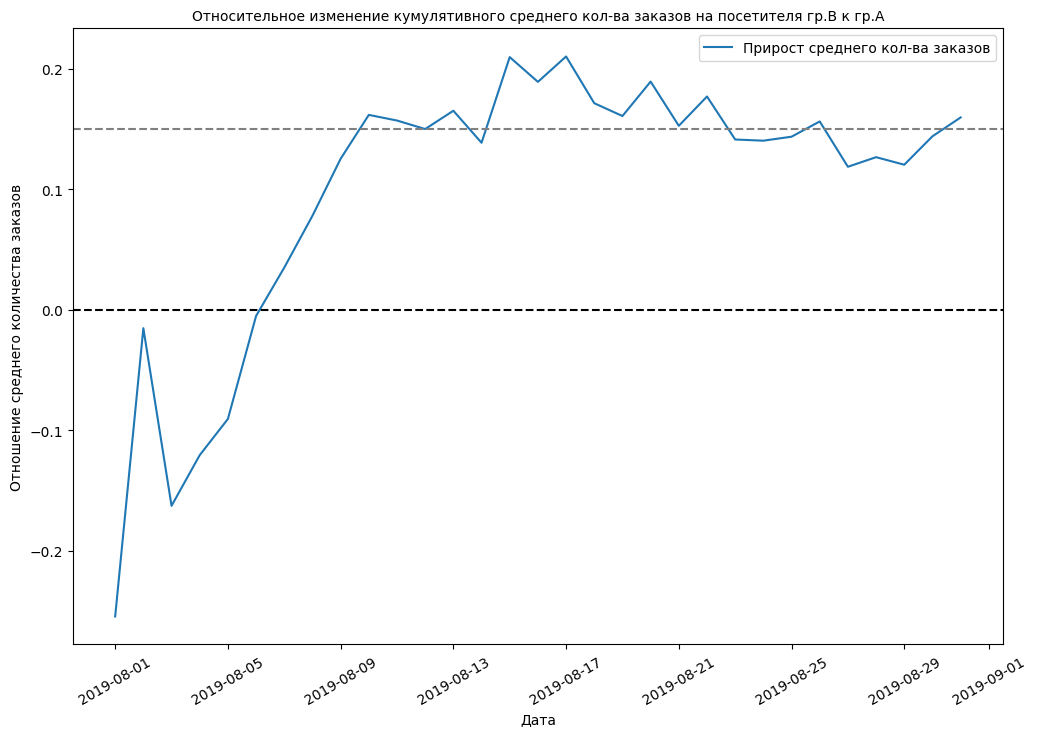

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','avg_ord']]\
.merge(cumulativeDataB[['date','avg_ord']], left_on='date', \
       right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (12, 8))
plt.plot(mergedCumulativeConversions['date'], \
         mergedCumulativeConversions['avg_ordB']/mergedCumulativeConversions['avg_ordA']-1, label="Прирост среднего кол-ва заказов")
plt.legend()
plt.title('Относительное изменение кумулятивного среднего кол-ва заказов на посетителя гр.В к гр.А', fontsize=10)
plt.xlabel('Дата')
plt.ylabel('Отношение среднего количества заказов')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.xticks(rotation = 30)
plt.show()

Видим, что группа В начинает лидировать уже после первой недели, на второй неделе кумулятивное среднее группы В уже превышает отметку в 15%, оставаясь в дальнейшем примерно в пределах 10-20%.

### Точечный график количества заказов по пользователям

In [21]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'transactions']

ordersByUsers.sort_values(by='transactions', ascending=False).head(10)


,visitorId,transactions
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Итак, наибольшее количество заказов здесь 3. Посмотрим подробнее на диаграмме рассеивания:

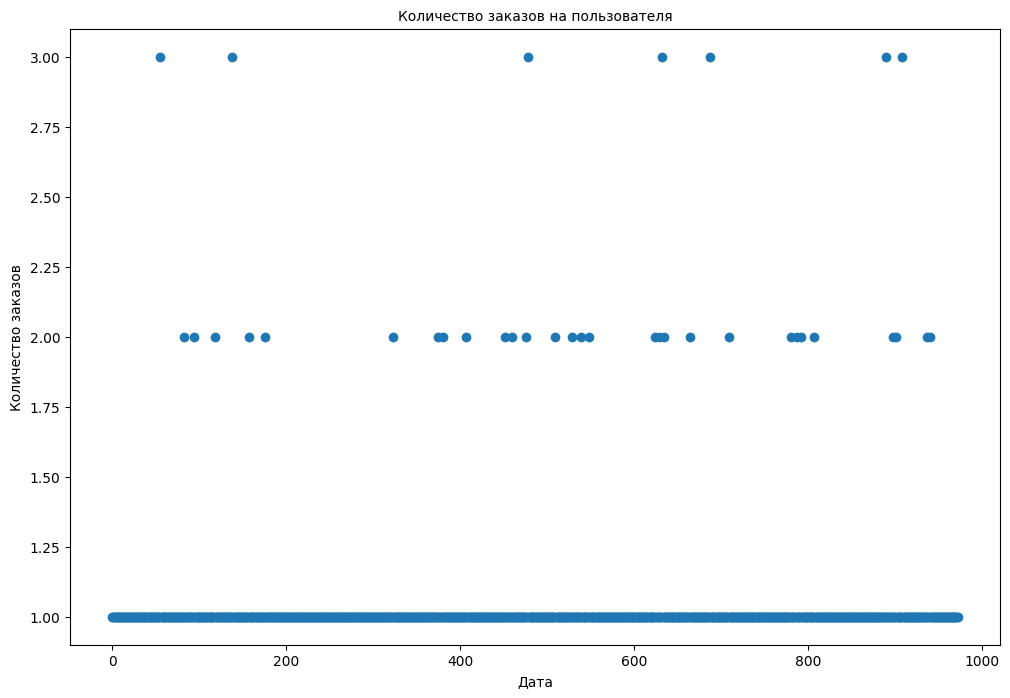

In [22]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize = (12, 8))
plt.scatter(x_values, ordersByUsers['transactions'])
plt.title('Количество заказов на пользователя', fontsize=10)
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

Наиболее популярное количество заказов - 1, а 2 и 3 это уже редкость.

### 95-й и 99-й  перцентили количества заказов по пользователям

In [23]:
print(np.percentile(ordersByUsers['transactions'], [95, 99]))

[1. 2.]


Итак, даже два заказа - выбивающиеся значения.

### Точечный график стоимостей заказов

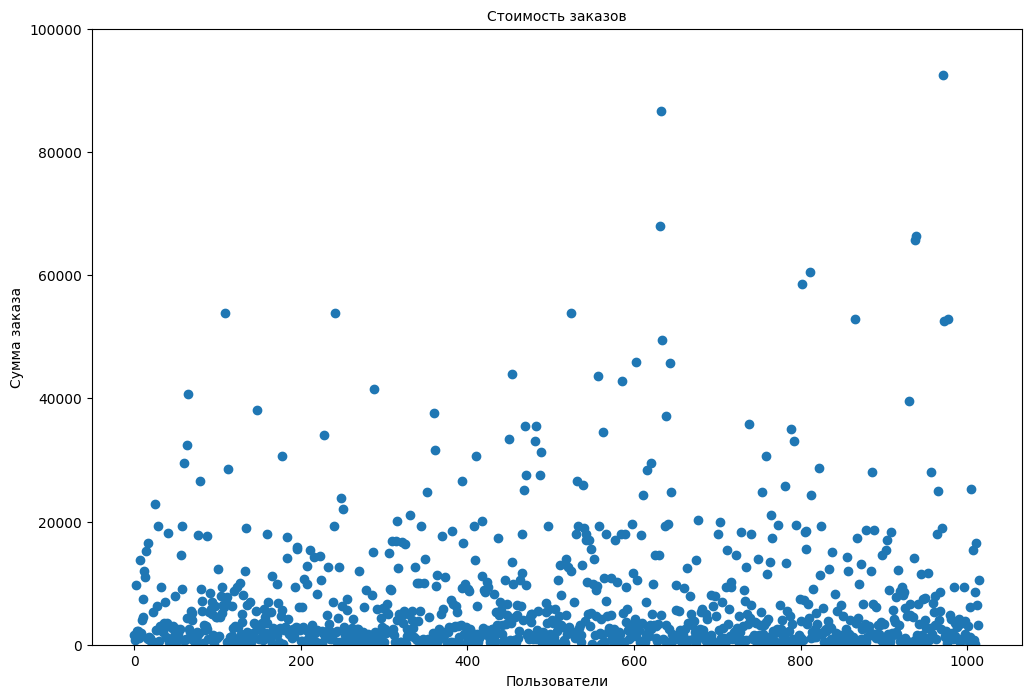

In [24]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize = (12, 8))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов', fontsize=10)
plt.xlabel('Пользователи')
plt.ylabel('Сумма заказа')
plt.ylim(0,100000)
plt.show()

Поскольку на графике есть выбросы, приблизим график, исключив из поля видимости заказы свыше 100 000. Видим, что большинство заказов лежат в диапазоне от 0 до 20 000, Что касается выбросов, то посмотрим на них более детально далее.

### 95-й и 99-й перцентили стоимости заказов

Для понимания средней стоимости заказов оценим медиану

In [25]:
orders['revenue'].median()

2955.0

In [26]:
#а теперь уже посмотрим на последние перцентили
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более, чем у 5% заказов чек дороже 26785 рублей. И не больше, чем у 1% заказов - дороже 53904.
Видим, что при медиане около 3тыс даже заказ более 50тыс будет уже аномально большим.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Попробуем посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами вместе с нашими аномалиями.

Установим уровень значимости alpha в 0,05 и сформулируем нулевую и альтернативную гипотезы:

- H0 - Различий в среднем количестве заказов на посетителя по "сырым данным" между группами нет.

- H1 - Различия в среднем количестве заказов на посетителя по "сырым данным" между группами есть.

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

Создадим переменные ordersByUsersA и ordersByUsersB. 

В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [28]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [29]:
sampleA = (
    pd.concat([ordersByUsersA['orders'],pd.Series(0, 
    index=np.arange(data['visitorsPerDateA'].sum() 
    - len(ordersByUsersA['orders'])), name='orders')],axis=0)
)

sampleB = (
    pd.concat([ordersByUsersB['orders'],pd.Series(0,
    index=np.arange(data['visitorsPerDateB'].sum() 
    - len(ordersByUsersB['orders'])), name='orders')],axis=0)
)

Проведем проверку с помощью критерия Манна-Уитни:

In [30]:
print('Значение P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Значение P-value:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha = .05

if stats.mannwhitneyu(sampleA, sampleB)[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Значение P-value: 0.011
Значение P-value: 0.160
Отвергаем нулевую гипотезу


P-value меньше 0,05, поэтому нулевую гипотезу отвергаем. Получается, что по "сырым данным" есть статистически значимые различия в среднем количестве заказов между группами А и В. При этом относительный прирост среднего количества заказов на посетителя группы В к среднему группы А равен 16%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "сырым данным".

Установим уровень значимости alpha в 0,05 и сформулируем нулевую и альтернативную гипотезы:

- H0 - Различий в среднем чеке заказа по "сырым данным" между группами нет.

- H1 - Различия в среднем чеке заказа по "сырым данным" между группами есть.

In [31]:
print(
    'Значение P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
    orders[orders['group']=='B']['revenue'])[1])
    )
print(
    'Значение P-value:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()
    /orders[orders['group']=='A']['revenue'].mean()-1)
    )

alpha = .05

if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
    orders[orders['group']=='B']['revenue'])[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Значение P-value: 0.829
Значение P-value: 0.287
Не получилось отвергнуть нулевую гипотезу


P-value значительно больше 0,05, а значит нулевую гипотезу отвергнуть не удалось. Статистически значимых различий по "сырым данным" в среднем чеке заказа между группами нет. Однако относительное различие чека между группам составило 28.7%, скорее всего повлияли выбросы.

### Очистка данных от выбросов

Итак, теперь уберем выбросы и посмотрим, повлияет ли это на статистическую значимость в среднем чеке и в среднем количестве заказов между группами.

In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)
abnormalUsers.shape[0]

50

Итак, аномальных юзеров всего 50, это, как мы помним, около 5% от общего числа. Уберем их из анализа и посмотрим, как они влияли на результаты.

In [33]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Теперь посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по очищенным данным.

Установим уровень значимости alpha в 0,05 и сформулируем нулевую и альтернативную гипотезы:

- H0 - Различий в среднем количестве заказов на посетителя по "очищенным данным" между группами нет.

- H1 - Различия в среднем количестве заказов на посетителя по "очищенным данным" между группами есть.

In [34]:
print('Значение P-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Значение P-value:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

if stats.mannwhitneyu(sampleA, sampleB)[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Значение P-value: 0.007
Значение P-value: 0.191
Отвергаем нулевую гипотезу


Как видим, статистическая значимость достигнута, очищенные данные показывают аналогичный результат. А значит, принимаем альтернативную гипотезу - различия в среднем количестве заказов на посетителя по "очищенным" данным есть. Группа В действительно лучше группы А. Относительная разница выросла с 16 до 19%. То есть посетители группы В на 19% чаще совершают покупки. 

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Считаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным.

Установим уровень значимости alpha в 0,05 и сформулируем нулевую и альтернативную гипотезы:

- H0 - Различий в среднем чеке заказа между группами по "очищенным данным" нет.

- H1 - Различия в среднем чеке заказа между группами по "очищенным данным" есть.

In [35]:
print( 'Значение P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Значение P-value:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Значение P-value: 0.964
Значение P-value: 0.028


P-value стало еще больше, а значит нулевую гипотезу даже на очищенных данных отвергнуть не удалось. Статистически значимых различий в среднем чеке заказа между группами нет. Относительное различие чека между группам составило гораздо меньше, чем в сырых данных - 2.8%

### Принятие решения по результатам теста

Что мы выяснили в результате теста

- Есть статистически значимое различие в среднем количестве заказов на посетителя между группами А и В как согласно сырым данным, так и после фильтрации аномальных значений. Группа B лидирует.

- Нет статистически значимых различий по среднему чеку между группами ни до, ни после фильтрации аномалий.

- График кумулятивного среднего количества заказов на посетителя между группами показывает, что результаты группы B стабильно лучше группы A.

- График различия среднего чека сильно колебался, благодаря ему мы заметили аномалии. Но на его основании делать выводы нельзя.

Итак, тест следует остановить и признать его успешным. Победила группа В.
